<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/IA_P3_2016630128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practice 3: Non-linear filters and neighbourhoods</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesor`**: Flavio Arturo Sanchez Garfias.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica3/Images

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Image_analisis/Practica3/Images


# **Non-linear filters**

Nonlinear filters have quite different behavior compared to linear filters. For nonlinear filters, the filter output or response of the filter does not obey the principles outlined earlier, particularly scaling and shift invariance. Moreover, a nonlinear filter can produce results that vary in a non-intuitive manner.

The simplest nonlinear filter to consider is the median or rank-order filter. In the median filter, filter output depends on the ordering of input values, usually ranked from smallest to largest or vice versa. A filter support range with an odd number of values is used, making it easy to select the output.

For example, suppose a filter was based on five values. In the region of interest, x0..x4, the values are ordered from smallest to largest. The value at position 2 is selected as the output. Consider the case at low frequency; all the values are the same or close to it. In this case, the value selected will be the original value ± some small error. In the case of high frequency, such as an edge, the values on one side of the edge will be low and the values on the other side will be high. When the ordering is done, the low values will still be in the low position and the high values will still be in the high position. A selection of the middle value will either be on the low side or the high side, but not in the middle, as would be the case using a linear low-pass filter. The median filter is sometimes called an edge-preserving filter due to this property. It is useful in removing outliers such as impulse noise.

# **Neighbourhoods**

Neighbourhood operations are a method of analysing data in a GIS environment. They are especially important when a situation requires the analysis of relationships between locations, rather than interpret the characteristics at individual locations. 

Neighbourhood operations are commonly called ‘Focal Functions’ since each operation performed generates a value for the ‘focus’ of a neighbourhood. The neighbourhood focus is generally called the scanning cell and its neighbours – that is the cells surrounding it – are known as the scanning neighbourhood. The scanning neighbourhood can take on various sizes and shapes, which are defined by selecting the appropriate options in the GIS package.

Neighbourhood operations work by moving across a raster grid map, one cell at a time. As each cell is visited, it becomes the scanning cell and a new value is computed for that cell as a function of its scanning neighbourhood. All computed values are then placed into the corresponding cells of the output map/theme. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


**Some Helpful functions**

In [ ]:
#Displays an array as an image
def im_show(pic,ip):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    #ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def grayscale(pic):
    height=pic.shape[0]
    width=pic.shape[1]
    
    channels=1
    if pic.ndim==3:
        channels=pic.shape[2]
    
    if channels==1:
        return pic

    factor=np.array([0.24,0.65,0.11])
    if channels==4:
        factor=np.array([0.24,0.65,0.11,1])

    pic2=np.dot(pic.astype(dtype=np.float),factor)

    return pic2.astype(dtype=np.uint8)

def noise(img, salt, pepper):
    height=img.shape[0]
    width=img.shape[1]  
    img_r=np.asarray(img.copy(),order="C")
    
    hw=height*width
    
    if salt>0 and salt<=1:
        npixels=int(float(hw)*salt)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=255
            
        
    if pepper>0 and pepper<=1:
        npixels=int(float(hw)*pepper)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=0
    
    return img_r

**Display the image**

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(3000, 4000, 3)
Channels:3
<class 'numpy.ndarray'>


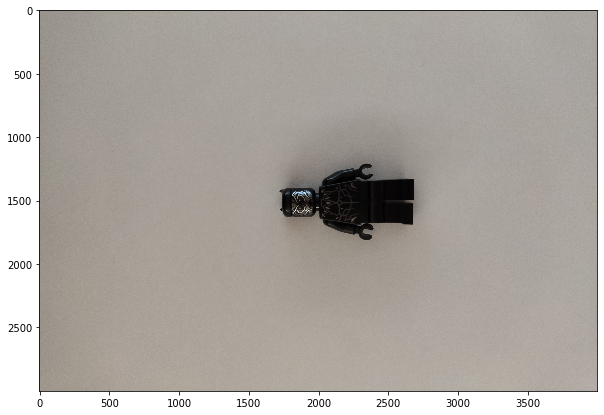

In [ ]:
ruta = "./"
nombre1 = "Imagen1.jpg"
arr_pic1 = im_load(ruta+nombre1)
im_show(arr_pic1,"nearest")

# **Convolution**

In the digital domain, convolution is performed by multiplying and accumulating the instantaneous values of the overlapping samples corresponding to two input signals, one of which is flipped. This definition of 1D convolution is applicable even for 2D convolution except that, in the latter case, one of the inputs is flipped twice.

This kind of operation is extensively used in the field of digital image processing wherein the 2D matrix representing the image will be convolved with a comparatively smaller matrix called 2D kernel.

The mathematical formulation of 2-D convolution is given by:

\begin{equation}
  g(x,y) = \omega * f(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} \omega (s,t)f(x-s, y-t)
\end{equation}

where: 

> $g(x,y)$ is the filtered image

> $f(x,y)$ is the original image

> $\omega$ is the filter kernel
 

Every element of the filter kernel is considered by:

> $-a\leq s\leq a$

> $-b\leq t\leq b$

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kernel_espejo(long[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def convolusion(const unsigned char[:,:] img1, const long[:,:] kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                    res+=tem
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = int(cython_valid_pixel(res))
    return img_r

<class 'numpy.ndarray'>


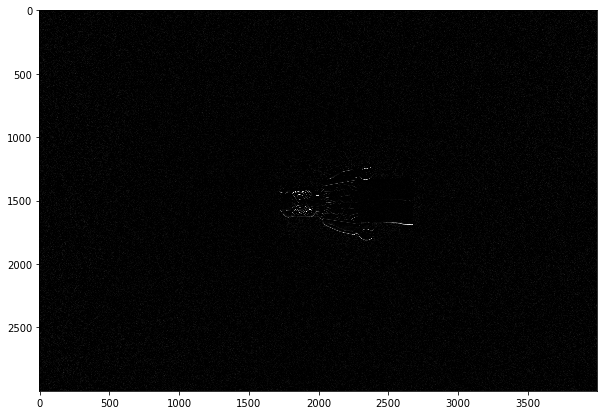

In [ ]:
kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
new_k = cython_kernel_espejo(kernel)
con = convolusion(grayscale(arr_pic1), new_k, 1,1)
im_show(con,"nearest")

# **Salt and Pepper Noice**

Salt-and-pepper noise is a form of noise sometimes seen on images. It is also known as impulse noise. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels. An effective noise reduction method for this type of noise is a median filter or a morphological filter. For reducing either salt noise or pepper noise, but not both, a contraharmonic mean filter can be effective.

<class 'numpy.ndarray'>


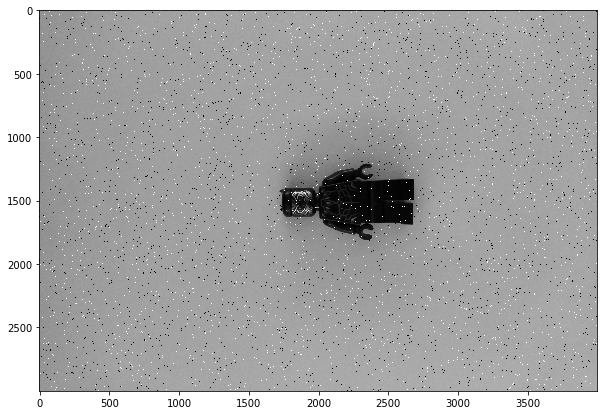

In [ ]:
gray = grayscale(arr_pic1)
im_noise = noise(gray, 0.01, 0.01)
im_show(im_noise,"nearest")

# **Min Filter**
The transformation replaces the central pixel with the darkest one in the running window.

This operation returns the value of the cell in the scanning neighbourhood with the lowest value.

MINIMUM is often used to locate "pits" in an elevation map, with an example being its use in detecting "spurious pits" (single-cell depressions in elevation data) prior to runoff simulations.

\begin{array}{|c|c|c|}
\hline
0&5&10\\
\hline
5&20&10\\
\hline
20&10&30\\
\hline
\end{array}

**Minimum = 0**


In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kernel_espejo(long[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def minimo(const unsigned char[:,:] img1, const long[:,:] kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            temporal = []
            #res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                    temporal.append(tem)
                    #res+=tem
                    conter_j+=1
                conter_i+=1
            inna = min(temporal)
            img_r[i,j] = int(cython_valid_pixel(inna))
    return img_r

<class 'numpy.ndarray'>


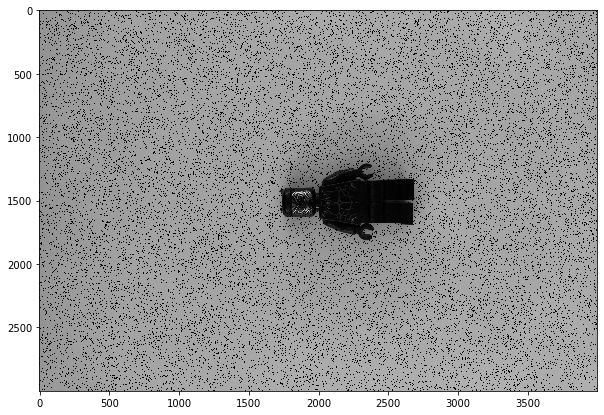

In [ ]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
new_k = cython_kernel_espejo(kernel)
con = minimo(im_noise, new_k, 1,1)
im_show(con,"nearest")

# **Max Filter**
The maximum and minimum filters are shift-invariant. Whereas the minimum filter replaces the central pixel with the darkest one in the running window, the maximum filter replaces it with the lightest one.

The maximum operation returns the value of the cell in the scanning neighbourhood which has the highest value. The input map data can be ratio, interval or ordinal.

An example of the use of this statistic is to value each cell according to the most valuable resource in the local area.

\begin{array}{|c|c|c|}
\hline
0&5&10\\
\hline
5&20&10\\
\hline
20&10&30\\
\hline
\end{array}

**Maximum = 30**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kernel_espejo(long[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def maximo(const unsigned char[:,:] img1, const long[:,:] kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            temporal = []
            #res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    if kernel[k_i, k_j] > -1:
                        tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                        temporal.append(tem)
                    #res+=tem
                    conter_j+=1
                conter_i+=1
            inna = max(temporal)
            img_r[i,j] = int(cython_valid_pixel(inna))
    return img_r

<class 'numpy.ndarray'>


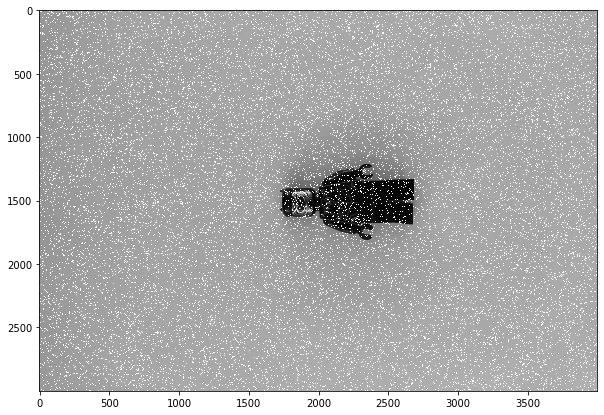

In [ ]:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
new_k = cython_kernel_espejo(kernel)
con = maximo(im_noise, new_k, 1,1)
im_show(con,"nearest")

# **Median Filter**

The median filter is a very popular image transformation which allows the preserving of edges while removing noise.

The median filter processes the image in the running window with a specified radius, and the transformation makes the target pixel luminosity equal to the mean value in the running window. This filter works well for removing noise, especially impulse noise. 

This operation returns the median (middle) value of the scanning neighbourhood values. The input map data may be ratio, interval or ordinal.

The MEDIAN operation is used under similar circumstances to AVERAGE - ie. for smoothing values in a map.

\begin{array}{|c|c|c|}
\hline
0&5&10\\
\hline
5&20&10\\
\hline
20&10&30\\
\hline
\end{array}

**Median = 10**

In [ ]:
%%cython -a
import numpy as np
import statistics
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kerneld_espejo(double[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def mediano(const unsigned char[:,:] img1, const double[:,:] kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            temporal = []
            #res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    if kernel[k_i, k_j] > 0:
                        tem = float(img_t[conter_i, conter_j])
                        temporal.append(tem)
                    #res+=tem
                    conter_j+=1
                conter_i+=1
            temporal.sort()
            inna = statistics.median(temporal)
            img_r[i,j] = int(cython_valid_pixel(inna))
    return img_r

<class 'numpy.ndarray'>


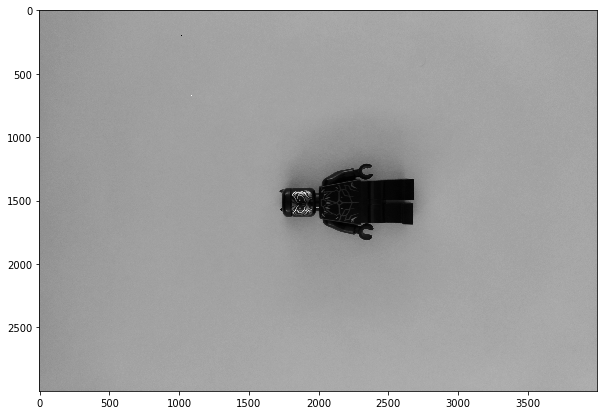

In [ ]:
kernel = np.array([[0.0,0.6,0.0],[0.6,0.6,0.6],[0.0,0.6,0.0]])
new_k = cython_kerneld_espejo(kernel)
con = mediano(im_noise, new_k, 1,1)
im_show(con,"nearest")

# **Average Filter**

Mean filter, or average filter is windowed filter of linear class, that smoothes signal (image). The filter works as low-pass one. The basic idea behind filter is for any element of the signal (image) take an average across its neighborhood. To understand how that is made in practice, let us start with window idea.

This statistic calculates the mean value of the data present in the scanning neighbourhood. The input map data must be ratio or interval.

AVERAGE is often used to "smooth" values in a map and as such is equivalent to a low pass filter in remote sensing. An example is the smoothing of terrain prior to analysis so as to remove small errors/noise in the data.

\begin{array}{|c|c|c|}
\hline
0&5&10\\
\hline
5&20&10\\
\hline
20&10&30\\
\hline
\end{array}

**Average = 12.22**

In [ ]:
%%cython -a
import numpy as np
from statistics import mean
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kerneld_espejo(double[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def average(const unsigned char[:,:] img1, const double[:,:] kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            temporal = []
            #res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    if kernel[k_i, k_j] > 0:
                        tem = float(img_t[conter_i, conter_j])
                        temporal.append(tem)
                    #res+=tem
                    conter_j+=1
                conter_i+=1
            inna = np.mean(temporal)
            img_r[i,j] = int(cython_valid_pixel(inna))
    return img_r

<class 'numpy.ndarray'>


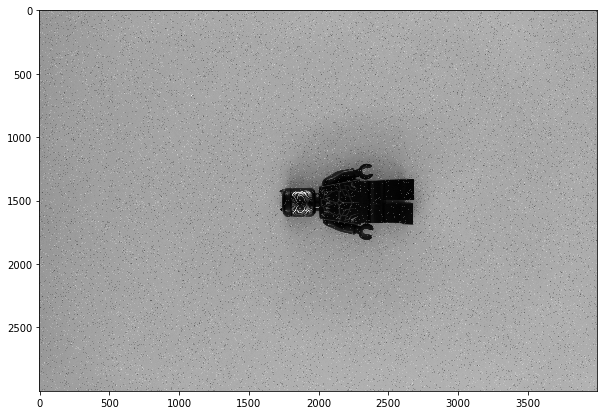

In [ ]:
kernel = np.array([[0.0,0.6,0.0],[0.6,0.6,0.6],[0.0,0.6,0.0]])
new_k = cython_kerneld_espejo(kernel)
con = average(im_noise, new_k, 1,1)
im_show(con,"nearest")

# **Conclution**

As we could see in past practice, convolusion is a very important operation in the analysis of images, since it depends on the kernel that we handle, it will be the effect that it will give to the image, however the convolusion principle can be used to be able to perform other operations on the image, as in this case we use the convolusion principle to remove noise from an image.

For this we also made use of operations that deal in statistics such as the median, average, maximum and minimum only in this case applied with the image pixels